## HW2: Linear Discriminant Analysis
In hw2, you need to implement [Fisher’s linear discriminant](https://towardsdatascience.com/fishers-linear-discriminant-intuitively-explained-52a1ba79e1bb) by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get **zero point** by simply calling `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` 

## Load data

In [20]:
#from google.colab import drive
#drive.mount('/content/drive')

In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
#path = "/content/drive/MyDrive/Image_recognition/HW2/"
path = ""
x_train = pd.read_csv(path + "x_train.csv").values
y_train = pd.read_csv(path + "y_train.csv").values[:,0]
x_test = pd.read_csv(path + "x_test.csv").values
y_test = pd.read_csv(path + "y_test.csv").values[:,0]

In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 2)
(750,)
(250, 2)
(250,)


In [24]:
temp = x_train
print(temp[ : , 0:1].shape)
print(temp == x_train)
temp = x_train
print(temp[ : , 1:].shape)
print(temp)

(750, 1)
[[ True  True]
 [ True  True]
 [ True  True]
 ...
 [ True  True]
 [ True  True]
 [ True  True]]
(750, 1)
[[1.84328628 3.16782315]
 [3.59876817 1.01205847]
 [1.52498795 2.82822721]
 ...
 [2.06263885 2.56559385]
 [2.34089632 2.46841746]
 [2.07271399 2.13851957]]


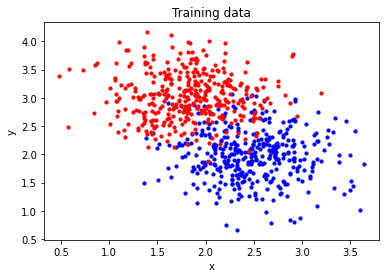

In [25]:
# x_train_x = x_train[:,0]; x_train_y = x_train[:,1]
x_train_x, x_train_y = x_train[ : , 0:1], x_train[ : , 1:] 

# Construct class 1 and class 2. Each consists of x,y pair
c1, c2 = np.array([]), np.array([])
for i in range(750):
    if y_train[i] == 0 :
        c1 = np.append(c1, x_train[i])
    elif y_train[i] == 1 :
        c2 = np.append(c2, x_train[i])

c1 = c1.reshape((-1,2))
c2 = c2.reshape((-1,2))
#print(c1)

# Draw class 1 (blue) and class 2 (red)
plt.title('Training data')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(c1[:,0:1], c1[:,1:], s=10, c='blue')
plt.scatter(c2[:,0:1], c2[:,1:], s=10, c='red')
plt.show()

## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [26]:
## Your code HERE
m1, m2 = c1.mean(axis=0), c2.mean(axis=0)

In [27]:
print(f"mean vector of class 1: {m1}", f"mean vector of class 2: {m2}")

mean vector of class 1: [2.47107265 1.97913899] mean vector of class 2: [1.82380675 3.03051876]


## 2. Compute the Within-class scatter matrix SW

In [28]:
## Your code HERE
s1 = np.matmul((c1-m1).T, c1-m1 )
s2 = np.matmul((c2-m2).T, c2-m2 )
sw = s1+s2

In [29]:
assert sw.shape == (2,2)
print(f"Within-class scatter matrix SW: {sw}")

Within-class scatter matrix SW: [[140.40036447  -5.30881553]
 [ -5.30881553 138.14297637]]


## 3.  Compute the Between-class scatter matrix SB

In [30]:
## Your code HERE
sb = np.matmul( (m1-m2).reshape((2,1)), (m1-m2).reshape((1,2)) )

In [31]:
assert sb.shape == (2,2)
print(f"Between-class scatter matrix SB: {sb}")

Between-class scatter matrix SB: [[ 0.41895314 -0.68052227]
 [-0.68052227  1.10539942]]


## 4. Compute the Fisher’s linear discriminant

In [32]:
## Your code HERE
eig_vals, eig_vecs = np.linalg.eig( np.matmul(np.linalg.inv(sw), sb) )
idxs = np.argsort(abs(eig_vals), axis=0) # idxs [] is the order of the element
print(eig_vecs)
print(eig_vals)
print(idxs)
eig_vals = eig_vals[idxs[-1]] # idxs[-1] is index of max eigenvalue
eig_vecs = eig_vecs[: ,idxs[-1]]

w = eig_vecs.reshape((2,1))
print(w)

[[-0.85156324  0.50266214]
 [-0.5242519  -0.86448295]]
[0.         0.01062874]
[0 1]
[[ 0.50266214]
 [-0.86448295]]


In [33]:
assert w.shape == (2,1)
print(f" Fisher’s linear discriminant: {w}")

 Fisher’s linear discriminant: [[ 0.50266214]
 [-0.86448295]]


## 5. Project the test data by linear discriminant and get the class prediction by nearest-neighbor rule.  Calculate the accuracy score 
you can use `accuracy_score` function from `sklearn.metric.accuracy_score`

In [34]:
'''
# It is the nearest-neighbor rule
# Accuracy = 0.88 (not enough)
def prediction(w, x_train, x_test):
  prjx_train = w.T.dot(x_train.T)[0]
  prjx_test = w.T.dot(x_test.T)[0]
  #print(prjx_train)
  #print(prjx_test)
  test_result = np.array([])
  for xt in prjx_test:
    #print(xt)
    temp = np.full((750),xt) # temp is a np array which is full of a test element xt
    test_sub_train = abs(temp - prjx_train).tolist() # test_sub_train is a list which is tranformed from temp - prjx_train absolute value np array
    #print(test_sub_train)
    nearest_index = test_sub_train.index(min(test_sub_train)) # Find the nearest_index
    #print(nearest_index)
    test_result = np.append(test_result, np.array([ y_train[nearest_index] ])) # Append class of x_train[nearest_index] in test_result 
  #print(test_result)
  return test_result
'''
# It is the nearest-mean-neighbor rule
# Accuracy = 0.908
prjx_test = np.matmul(x_test, w) # y = xw
#print(prjx_test)
prjm1 = np.matmul(m1, w)
#print(prjm1)
prjm2 = np.matmul(m2, w)
test_result = np.array([]) # Put 0 or 1 (class number)
for xt in prjx_test:
    if abs(prjm1 - xt) < abs(prjm2 - xt) :
        cls = 0
    else:
        cls = 1
    #print(nearest_index)
    test_result = np.append(test_result, np.array([ cls ])) # Append class of x_train[nearest_index] in test_result 
  


In [35]:
from sklearn.metrics import accuracy_score
y_pred = test_result
acc = accuracy_score(y_test, y_pred)

In [36]:
print(f"Accuracy of test-set {acc}")

Accuracy of test-set 0.908


## 6. Plot the 1) best projection line on the training data and show the slope and intercept on the title (you can choose any value of intercept for better visualization) 2) colorize the data with each class 3) project all data points on your projection line. Your result should look like [this image](https://i.imgur.com/tubMQpw.jpg)

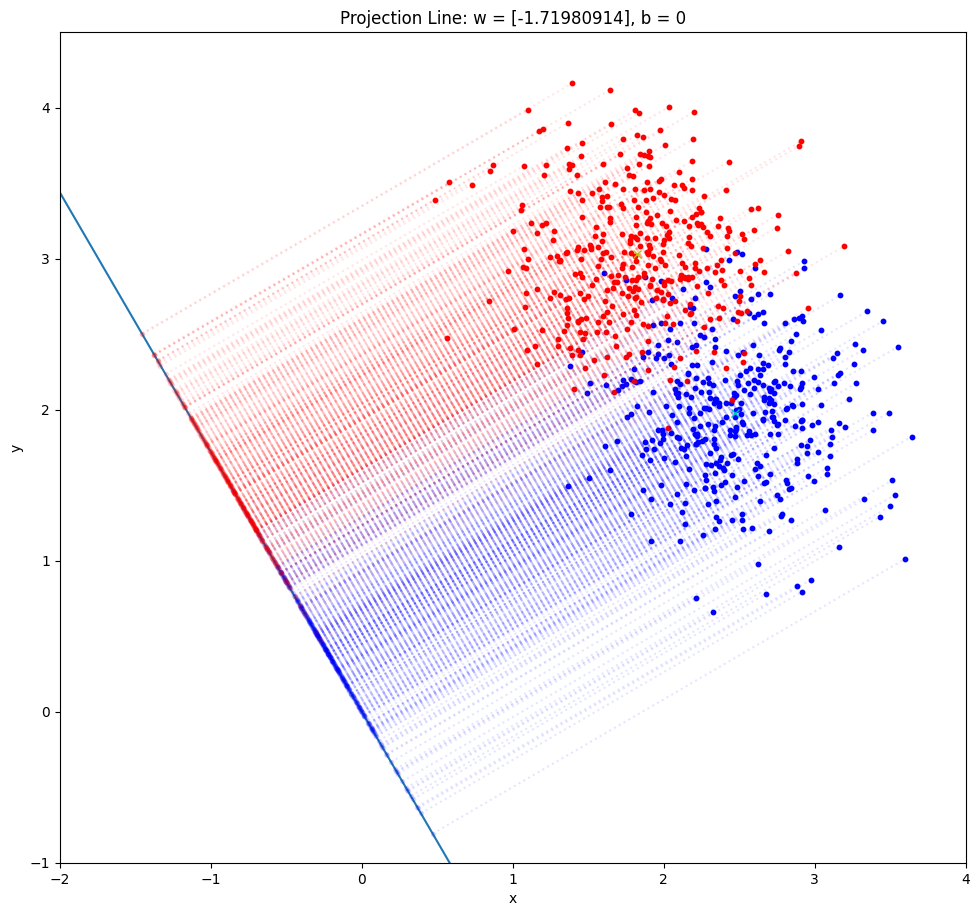

In [37]:
plt.figure(figsize = (6*2, 5.5*2), dpi = 100)
plt.title('Projection Line: w = {}, b = {}'.format(w[1]/w[0], 0))

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(c1[:,0:1], c1[:,1:], s=10, c='blue')
plt.scatter(c2[:,0:1], c2[:,1:], s=10, c='red')


# Plot project line
x = np.linspace(-2,4,200)
y = w[1]/w[0] * x 
plt.plot(x, y)

# Project data point on the project line
res = w
r = res.reshape(2,)
n2 = np.linalg.norm(r)**2
for pt in c1:
    prj = r * r.dot(pt) / n2
    plt.plot([prj[0], pt[0]], [prj[1], pt[1]], 'b.:', alpha=0.1)
for pt in c2:
    prj = r * r.dot(pt) / n2
    plt.plot([prj[0], pt[0]], [prj[1], pt[1]], 'r.:', alpha=0.1)

# Plot m1, m2
plt.plot(m1[0], m1[1], 'cx')
plt.plot(m2[0], m2[1], 'yx')
plt.gca().axis('square')

plt.xlim(-2, 4)
plt.ylim(-1, 4.5)

plt.savefig('FLD result.jpg')
plt.show()

In [38]:
print('Projection Line: w = {}, b = {}'.format(w[1]/w[0],0))

Projection Line: w = [-1.71980914], b = 0
